In [155]:
%matplotlib inline

import scipy.io
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import collections
import random
import glob
from scipy import ndimage
from sklearn.decomposition import FastICA

In [156]:
def plot(ax, data, **kwargs):
    ax.plot(data, **kwargs)
    ax.set_title(kwargs['label'])
    # scipy.io.wavfile.write(kwargs['label'] + '.wav', 8192, data),

seed = 13  # seed for random states to get always the same result

def generate_signals():
    timesteps = np.arange(0, 50.05, 0.05)
    signal1 = np.array([4 * np.sin(t - 3) for t in timesteps])
    signal2 = np.array([(t + 5) % 10 for t in timesteps])
    signal3 = np.array([-14 if np.cos(2*t) > 0 else 0 for t in timesteps])
    return np.array([signal1, signal2, signal3])

def whiten_data(data):
    C = np.cov(data)
    w, V = np.linalg.eigh(C)
    D = np.diag(1 / np.sqrt(w))
    M = D.dot(V)
    return M.dot(data)

def fast_ica(x, G):
    ica = FastICA(fun=G)
    unmixed = ica.fit_transform(x.T).T
    A_reconstructed = ica.mixing_
    return unmixed, A_reconstructed

def execute_and_plot_ica(signals, A, mixed, G='logcosh', minimalView=False, color='blue'):
    mixed_whiten = whiten_data(mixed)
    unmixed, A_red = fast_ica(mixed_whiten, G)
    if not minimalView:
        fig, ax = plt.subplots(4, 3, figsize=(13, 6))
        # TODO: LaTex for the signals formula
        plot(ax[0, 0], signals[0,:], label='Signal 1')
        plot(ax[0, 1], signals[1,:], label='Signal 2')
        plot(ax[0, 2], signals[2,:], label='Signal 3')
        plot(ax[1, 0], mixed[0,:], label='Mixed 1', color='red')
        plot(ax[1, 1], mixed[1,:], label='Mixed 2', color='red')
        plot(ax[1, 2], mixed[2,:], label='Mixed 3', color='red')
        plot(ax[2, 0], mixed_whiten[0,:], label='Whitened 1', color='orange')
        plot(ax[2, 1], mixed_whiten[1,:], label='Whitened 2', color='orange')
        plot(ax[2, 2], mixed_whiten[2,:], label='Whitened 3', color='orange')
        plot(ax[3, 0], unmixed[0,:], label='Unmixed 1', color='green')
        plot(ax[3, 1], unmixed[1,:], label='Unmixed 2', color='green')
        plot(ax[3, 2], unmixed[2,:], label='Unmixed 3', color='green')
        fig.tight_layout()
    else:
        fig, ax = plt.subplots(1, 3, figsize=(13, 2))
        plot(ax[0], unmixed[0,:], label='Unmixed 1', color=color)
        plot(ax[1], unmixed[1,:], label='Unmixed 2', color=color)
        plot(ax[2], unmixed[2,:], label='Unmixed 3', color=color)
        fig.tight_layout()

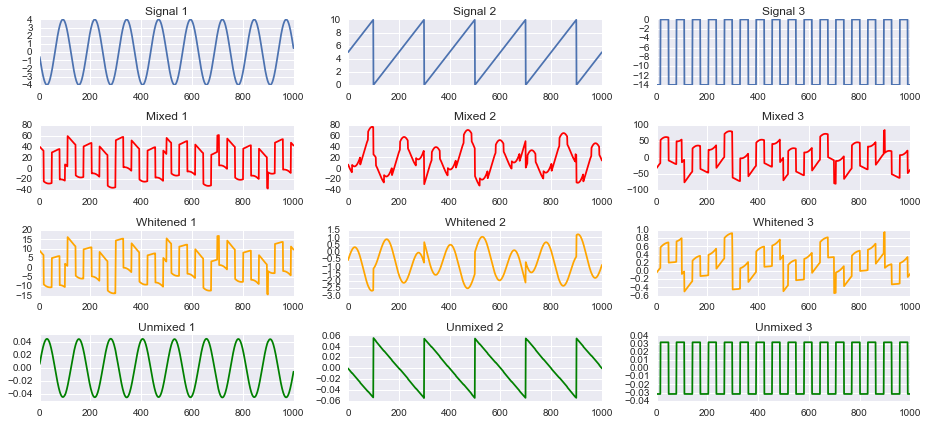

In [157]:
# 8.1. (a), (b), (c)
signals = generate_signals()
A = np.array([[2, -3, -4], [7, 5, 1], [-4, 7, 5]])
mixed = A.dot(signals)
execute_and_plot_ica(signals, A, mixed, G='exp')

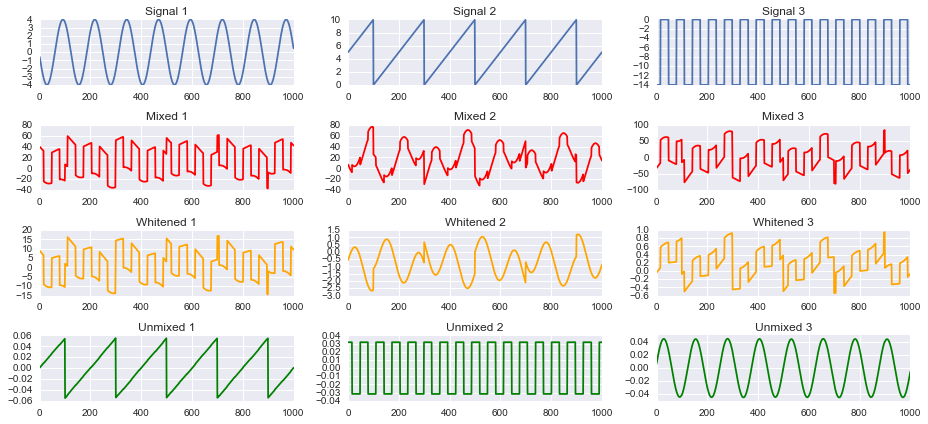

In [158]:
# 8.1. (d)
execute_and_plot_ica(signals, A, mixed, G='exp')

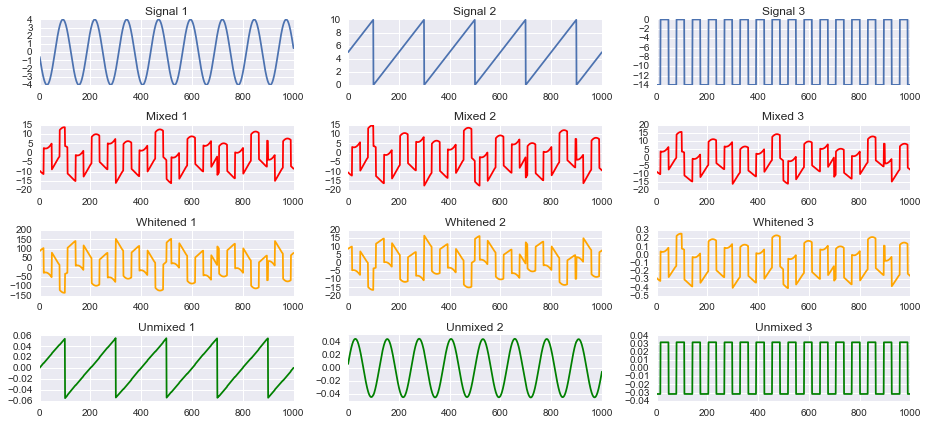

In [159]:
# 8.1. (e)
# det(A) = -123 ; det(A2) = -0.02  (det(singular_matrix) = 0)
A2 = np.array([[1, 1, 1], [1, 1.1, 1.1], [1, 1.2, 1]])
mixed = A2.dot(signals)
execute_and_plot_ica(signals, A2, mixed)

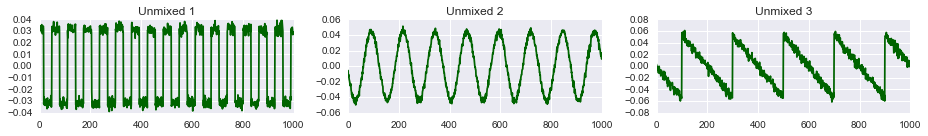

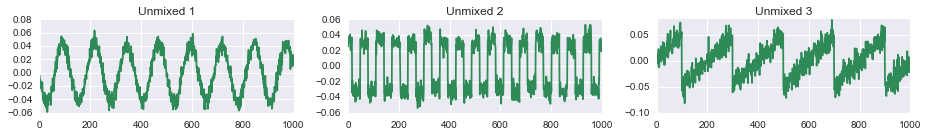

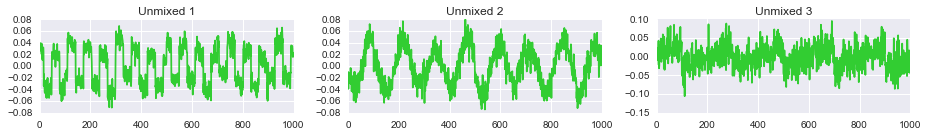

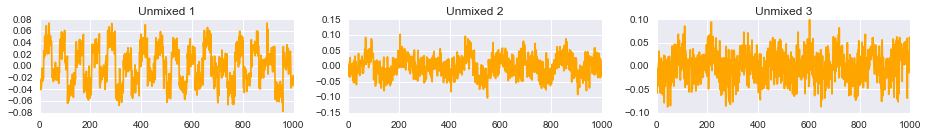

In [160]:
# 8.1. (f)

def gaussian_noise(variance):
    scale = np.sqrt(variance)
    size = np.prod(mixed.shape)
    noise = np.random.RandomState(seed).normal(0, scale, size).reshape(mixed.shape)
    return noise

mixed = A.dot(signals) + gaussian_noise(1)
execute_and_plot_ica(signals, A, mixed, minimalView=True, color='darkgreen')

mixed = A.dot(signals) + gaussian_noise(10)
execute_and_plot_ica(signals, A, mixed, minimalView=True, color='seagreen')

mixed = A.dot(signals) + gaussian_noise(100)
execute_and_plot_ica(signals, A, mixed, minimalView=True, color='limegreen')

mixed = A.dot(signals) + gaussian_noise(500)
execute_and_plot_ica(signals, A, mixed, minimalView=True, color='orange')

In [163]:
#8.2 TODO

In [ ]:
def sample_patches(images, count=5000, size=16):
    patches = np.empty((count, size * size))
    for i in range(count):
        image = random.choice(images)
        x = int(random.random() * (image.shape[0] - size))
        y = int(random.random() * (image.shape[1] - size))
        patches[i] = image[x: x + size, y: y + size].flatten()
    return patches

nature = [ndimage.imread(x) for x in glob.glob('imgpca/n*.jpg')]
# buildings = [ndimage.imread(x) for x in glob.glob('imgpca/b*.jpg')]
# text = [ndimage.imread(x) for x in glob.glob('imgpca/t*.jpg')]

nature = sample_patches(nature, count=1000, size=12)
# buildings = sample_patches(buildings, 5000)
# text = sample_patches(text, 5000)

print(nature.shape)
ica = FastICA(max_iter=1000)
reconstructed = ica.fit_transform(nature)  # Reconstruct signals
np.ndarray.reshape(reconstructed, (1000, 12, 12))

(1000, 144)
